<h2>Problem statement</h2>

A new pharmaceutical startup is recently acquired by one of the 
world's largest MNCs. For the acquisition process, the startup is 
required&nbsp;to tabulate all&nbsp;drugs that they have sold and account
 for each drug's effectiveness. A dedicated team has been assigned the 
task to analyze&nbsp;all the data. This data has been collected over the
 years and it contains data points such as the drug's name, reviews by 
customers, popularity and use cases of the drug, and so on. Members of 
this&nbsp;team are by the noise present in the data.

Your task is to make a sophisticated NLP-based Machine Learning model
 that has the mentioned features as the input. Also, use the input to 
predict the base score of a certain drug in a provided case.

<h2>Data</h2>

<p>The dataset has the following columns:</p>

<table border="1">
	<tbody>
		<tr>
			<td><strong>Variable Name</strong></td>
			<td><strong>Description</strong></td>
		</tr>
		<tr>
			<td>patient_id</td>
			<td>ID of patients</td>
		</tr>
		<tr>
			<td>name_of_drug</td>
			<td>Name of the drug prescribed</td>
		</tr>
		<tr>
			<td>use_case_for_drug</td>
			<td>Purpose of the drug</td>
		</tr>
		<tr>
			<td>review_by_patient</td>
			<td>Review by patient</td>
		</tr>
		<tr>
			<td>drug_approved_by_UIC</td>
			<td>Date of approval of the drug by UIC</td>
		</tr>
		<tr>
			<td>number_of_times_prescribed</td>
			<td>Number of times the drug is prescribed</td>
		</tr>
		<tr>
			<td>effectiveness_rating</td>
			<td>Effectiveness of drug</td>
		</tr>
		<tr>
			<td>base_score</td>
			<td>Generated score (Target Variable)</td>
		</tr>
	</tbody>
</table>

<h2>Data description</h2>

<p>The data folder consists of the following two&nbsp;<strong>.csv</strong> files:</p>

<ul>
	<li><strong>train.csv</strong> - (32165x 7)</li>
	<li><strong>test.csv</strong> - (10760x6)</li>
</ul>

<h2>Approach</h2>

This is a regression problem. Approach to solve this problem is as follows:
1. Data Engineering: After observing train.csv , find out corroupted usecases like 'users found this comment helpful'.
   I imputed those values with maximum value of 'use_case_for_drug' for that drug name and results are stored in
   train1.csv

2. Descriptive analysis is done:
  - Find mean, median and standard deviation.
  - Checking for missing or null values
  - Top 10 most reviewed drug names
  - Top 10 most suffered condition by reviewers
  - Top 10 drugs with best and worst rating
  - Top 10 'significant' drugs with best and worst rating"
  - Encoding the categorical attributes: 
     -#'name_of_drug','use_case_for_drug'. 
     -# date is converted to day, month and year.
  - Sentiment score is computed for each review.
 
 ( Please refer 'descriptive-analysis.ipynb')
 
 3. Feature Engineering:
    - Correlation with target attribute base_score is computed.
    - After model building try to understand feature importance.
    
 4. I tried to solve this regression problem with following tree based algorithms:
    - Random Forest
    - XGBoost
    - Lightgbm 
    
    (Plaese refer 'Xgboost.py', 'lgb.py' and RF.py)            
        
        
    
    Observation is XGboost performed well for this problem. Analysis is done with tuning different hyper-parameters
    and cross-validation.
    
  




In [2]:
# Read csv file
import pandas as pd 
df = pd.read_csv("train-1.csv") 
df.head(5)

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


In [3]:
print(df.shape)


(32157, 8)


In [4]:
# Finding the null values.
print(df.isnull().sum())

patient_id                    0
name_of_drug                  0
use_case_for_drug             0
review_by_patient             0
effectiveness_rating          0
drug_approved_by_UIC          0
number_of_times_prescribed    0
base_score                    0
dtype: int64


In [5]:
print("Number of Corrupted usecases: ", len(df[df.use_case_for_drug.str.contains(" users found this comment helpful.",na=False)]))
df = df[~df.use_case_for_drug.str.contains(" users found this comment helpful.",na=False)]

Number of Corrupted usecases:  0


In [7]:
import numpy as np
df.describe(include='all')

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
count,32157.000000,32157,32157,32157,32157.000000,32157,32157.000000,32157.000000
unique,NaN,2213,597,30113,NaN,3537,NaN,NaN
top,NaN,Levonorgestrel,Birth Control,"""Good""",NaN,18-Apr-17,NaN,NaN
freq,NaN,724,5875,8,NaN,37,NaN,NaN
mean,115486.058028,NaN,NaN,NaN,6.998912,NaN,27.896912,6.664428
std,67147.116451,NaN,NaN,NaN,3.274923,NaN,35.822509,1.588308
min,9.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,0.899076
25%,56914.000000,NaN,NaN,NaN,5.000000,NaN,6.000000,6.109307
50%,115768.000000,NaN,NaN,NaN,8.000000,NaN,16.000000,6.788245
75%,173562.000000,NaN,NaN,NaN,10.000000,NaN,36.000000,7.900790


In [6]:
df.head(5)

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


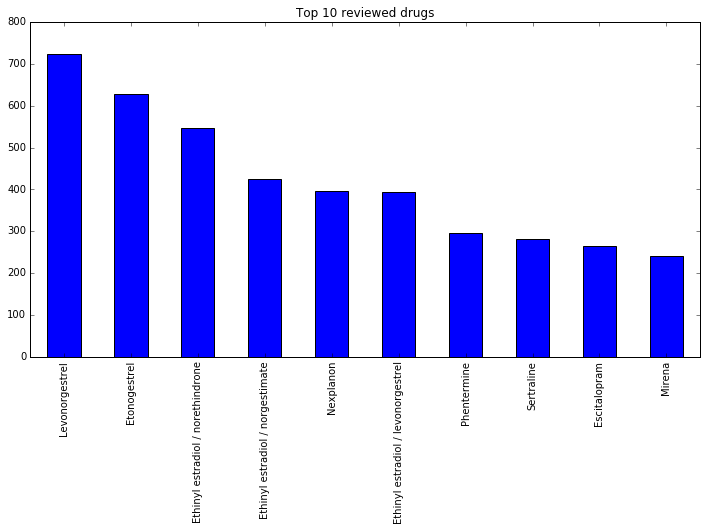

In [7]:
#Descriptive Analysis
%matplotlib inline
# Top 10 most reviewed drug names
plot = df.name_of_drug.value_counts().nlargest(10).plot(kind='bar', title="Top 10 reviewed drugs", figsize=(12,6))


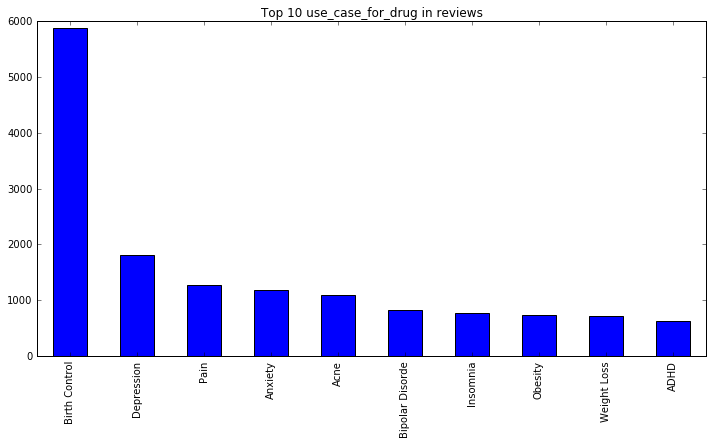

In [8]:
#Top 10 use_case_for_drug undergoing by drug reviewers
# Top 10 most suffered condition by reviewers
plot = df.use_case_for_drug.value_counts().nlargest(10).plot(kind='bar', title="Top 10 use_case_for_drug in reviews", figsize=(12,6))

In [9]:
print(df.isnull().sum())

patient_id                    0
name_of_drug                  0
use_case_for_drug             0
review_by_patient             0
effectiveness_rating          0
drug_approved_by_UIC          0
number_of_times_prescribed    0
base_score                    0
dtype: int64


In [10]:
#Top 10 drugs with best and worst rating
#When doing this analysis for all the drugs, there is a factor which affect the results:
#the number of reviews of a drug. I.e. if we want to compute the drug with best rating, 
#the drug which in only 1 review was given a 10 rating would be in TOP 1. 
#For this reason, we only consider drugs with a significant number of reviews. 
#A significant number of reviews is when the number of reviews for a drug is above the 75% of the number of reviews 
#distribution per drug.

drugs_rating = df.groupby('name_of_drug').agg({
    'base_score': np.mean,
})


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
import string
import html
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from datetime import datetime
from sklearn.preprocessing import normalize, MinMaxScaler
from scipy.stats import spearmanr, pearsonr
from nltk.corpus import stopwords
#from wordcloud import WordCloud, STOPWORDS
from IPython.core.interactiveshell import InteractiveShell

/root/anaconda3/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array
/root/anaconda3/lib/python3.5/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


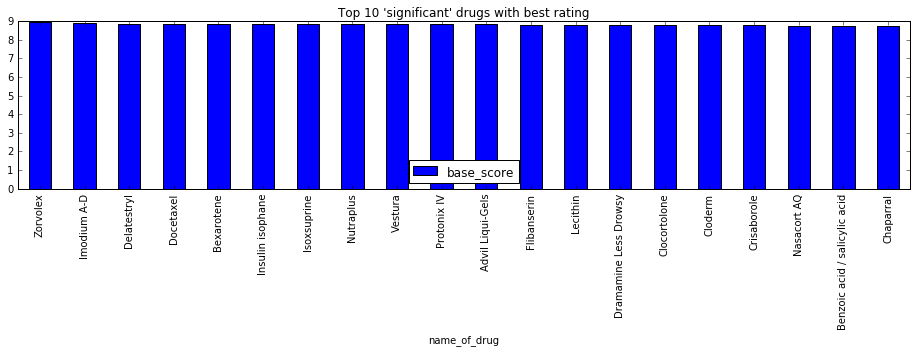

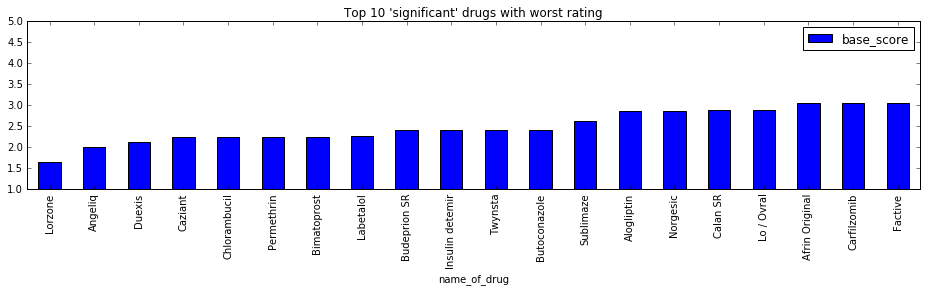

In [12]:
# We only use the drugs which number of reviews is higher than a threshold
#drugs_rating = drugs_rating[drugs_rating['name_of_drug'] > int(reviews_per_drug.quantile(q=0.75))]

# Top 10
top_drugs_rating = drugs_rating.nlargest(20, 'base_score')
plot = top_drugs_rating.plot(y='base_score', kind='bar', figsize = (16, 3))
dummy = plt.title("Top 10 'significant' drugs with best rating") # Assigned to variable to prevent output
dummy = plt.ylim(0, 9) # Assigned to variable to prevent output

# Bottom 10
bottom_drugs_rating = drugs_rating.nsmallest(20, 'base_score')
plot = bottom_drugs_rating.plot(y='base_score', kind='bar', figsize = (16, 3))
dummy = plt.title("Top 10 'significant' drugs with worst rating") # Assigned to variable to prevent output
dummy = plt.ylim(1, 5) # Assigned to variable to prevent output

In [13]:
# Encoding the categorical attributes
df['name_of_drug']=df['name_of_drug'].astype('category')
df['name_of_drug']=df.name_of_drug.cat.codes
df['use_case_for_drug']=df['use_case_for_drug'].astype('category')
df['use_case_for_drug']=df.use_case_for_drug.cat.codes


In [14]:
df.head(5)

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,2065,296,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,921,0,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,1210,71,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,332,373,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,436,66,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


In [15]:
df['drug_approved_by_UIC'] = pd.to_datetime(df['drug_approved_by_UIC'])
df['day'] = df['drug_approved_by_UIC'].dt.day
df['year'] = df['drug_approved_by_UIC'].dt.year
df['month'] = df['drug_approved_by_UIC'].dt.month


In [16]:
df.head(5)


,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,day,year,month
0,206461,2065,296,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,8.022969,20,2012,5
1,95260,921,0,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,7.858458,27,2010,4
2,92703,1210,71,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,6.341969,14,2009,12
3,35696,332,373,"""Suboxone has completely turned my life around...",9,2016-11-27,37,6.590176,27,2016,11
4,155963,436,66,"""2nd day on 5mg started to work with rock hard...",2,2015-11-28,43,6.144782,28,2015,11


In [17]:
start_date = df["drug_approved_by_UIC"].min()
end_date = df["drug_approved_by_UIC"].max()

print("First review date: ", start_date)
print("Last review date: ", end_date)


days_grouped = df.groupby(["year", "month"]) 
days_grouped = days_grouped.agg({
    'base_score': np.mean,
})

different_months = len(days_grouped)

print("Months on dataset: ", different_months)




First review date:  2008-02-24 00:00:00
Last review date:  2017-12-12 00:00:00
Months on dataset:  119


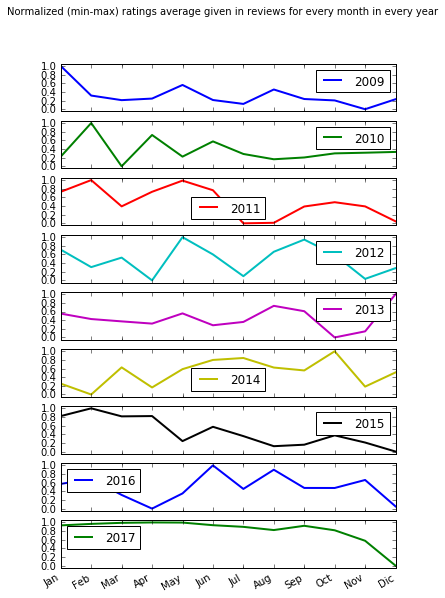

In [18]:
MME = MinMaxScaler() # Min-max normalization (0-1) for better visualization

grouped = days_grouped.reset_index(level=1)
index_values = np.unique(grouped.index.values)[1:] # First year (2008) month of January is missing

months = pd.DataFrame()

for year in index_values:
    months[year] = grouped.loc[year,:]["base_score"].values # Every column is a year
months_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dic"]

months.iloc[:,:] = MME.fit_transform(months) # Min Max Normalization by columns (year)

plots = months.plot(subplots=True, legend=True, figsize=(6,10), lw=2, title="Normalized (min-max) ratings average given in reviews for every month in every year")
for plot in plots:
    x = plot.set_ylim([-0.05, 1.05]) # Just assigning to variable so there is no output on notebook
x = plt.xticks(range(0, len(months_labels)), months_labels)

In [19]:
def encode_reviews(review):
    return html.unescape(review) # Decode in utf-8 and convert HTML characters

print("Review example: ", df.loc[0, 'review_by_patient']) # Example of review text

df['review_by_patient'] = df['review_by_patient'].apply(encode_reviews) # Let's clean the text...

df.head(2) # We are ready to go


Review example:  "It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"


,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,day,year,month
0,206461,2065,296,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,8.022969,20,2012,5
1,95260,921,0,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,7.858458,27,2010,4


In [20]:
# This might take some time... (3-5 minutes)
sid = SentimentIntensityAnalyzer() 
df["sentiment"] = df["review_by_patient"].apply(lambda x: sid.polarity_scores(x)["compound"])
# Compound is the overall sentiment score


In [21]:
# Spearman correlation between computed sentiment and given rating
spearmanr(df['sentiment'], df['effectiveness_rating']) # Low-moderate correlation can be seen


SpearmanrResult(correlation=0.32576100204927944, pvalue=0.0)

In [22]:
spearmanr(df['sentiment'], df['base_score']) # Low-moderate correlation can be seen


SpearmanrResult(correlation=0.13918138969849628, pvalue=8.2816324370374278e-139)

Pearson correlation coefficient (0.37377694151847962, 2.5476411088620856e-74)


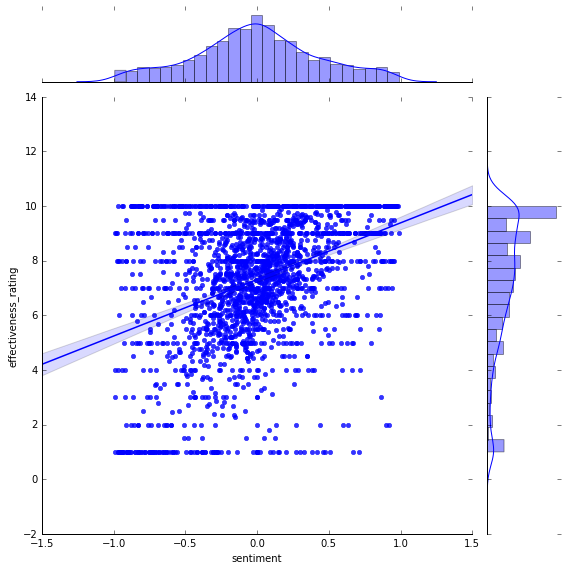

In [23]:
# Let's find how Vader performs for the average rating in the most reviewed drugs... 

drugs_sentiment = df.groupby(["name_of_drug"])
drugs_sentiment = drugs_sentiment.agg({
    'sentiment': np.mean, # drug sentiment average 
    'effectiveness_rating': np.mean,  # drug rating average
})

plot = sns.jointplot(x="sentiment", y="effectiveness_rating", data=drugs_sentiment, kind="reg", height=8, scatter_kws={"s": 20})

print("Pearson correlation coefficient", pearsonr(drugs_sentiment['sentiment'], drugs_sentiment['effectiveness_rating']))

Pearson correlation coefficient (0.19029474077993347, 1.7243102134865781e-19)


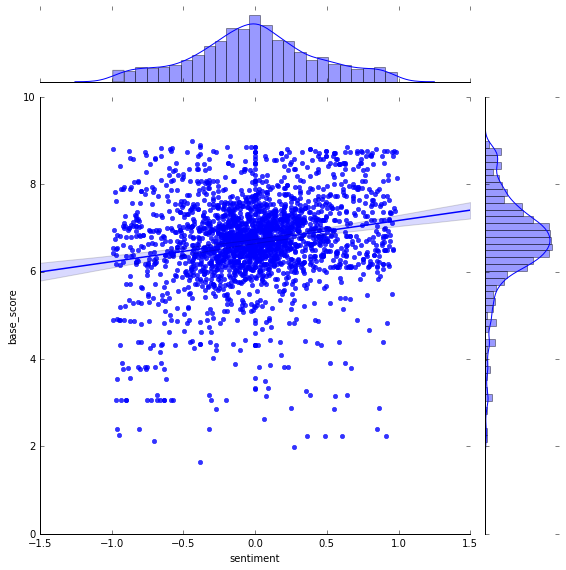

In [24]:
# Let's find how Vader performs for the average rating in the most reviewed drugs... 

drugs_sentiment = df.groupby(["name_of_drug"])
drugs_sentiment = drugs_sentiment.agg({
    'sentiment': np.mean, # drug sentiment average 
    'base_score': np.mean,  # drug rating average
})

plot = sns.jointplot(x="sentiment", y="base_score", data=drugs_sentiment, kind="reg", height=8, scatter_kws={"s": 20})

print("Pearson correlation coefficient", pearsonr(drugs_sentiment['sentiment'], drugs_sentiment['base_score']))

In [25]:
df.head(5)

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,day,year,month,sentiment
0,206461,2065,296,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,8.022969,20,2012,5,-0.2960
1,95260,921,0,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,7.858458,27,2010,4,0.8603
2,92703,1210,71,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,6.341969,14,2009,12,0.7645
3,35696,332,373,"""Suboxone has completely turned my life around...",9,2016-11-27,37,6.590176,27,2016,11,0.9403
4,155963,436,66,"""2nd day on 5mg started to work with rock hard...",2,2015-11-28,43,6.144782,28,2015,11,-0.8187


In [26]:
# save data to csv
df.to_csv('CleanTrainData.csv',index=False)

,patient_id,name_of_drug,use_case_for_drug,effectiveness_rating,number_of_times_prescribed,base_score,day,year,month,sentiment
patient_id,1.000000,-0.016510,-0.016660,0.018691,0.017511,0.011160,-0.002266,-0.009451,0.007495,0.016805
name_of_drug,-0.016510,1.000000,0.082331,0.004930,0.021322,0.005496,-0.008846,0.014032,-0.003763,-0.003211
use_case_for_drug,-0.016660,0.082331,1.000000,0.053067,0.093279,0.013548,-0.003248,-0.052903,-0.004013,-0.008569
effectiveness_rating,0.018691,0.004930,0.053067,1.000000,0.242245,0.412531,0.009299,-0.197281,-0.029049,0.342473
number_of_times_prescribed,0.017511,0.021322,0.093279,0.242245,1.000000,0.134255,-0.003005,-0.271679,-0.036274,0.063904
base_score,0.011160,0.005496,0.013548,0.412531,0.134255,1.000000,0.007081,-0.085456,-0.028662,0.145354
day,-0.002266,-0.008846,-0.003248,0.009299,-0.003005,0.007081,1.000000,-0.012860,-0.019674,-0.001581
year,-0.009451,0.014032,-0.052903,-0.197281,-0.271679,-0.085456,-0.012860,1.000000,-0.086893,-0.093822
month,0.007495,-0.003763,-0.004013,-0.029049,-0.036274,-0.028662,-0.019674,-0.086893,1.000000,-0.014697
sentiment,0.016805,-0.003211,-0.008569,0.342473,0.063904,0.145354,-0.001581,-0.093822,-0.014697,1.000000


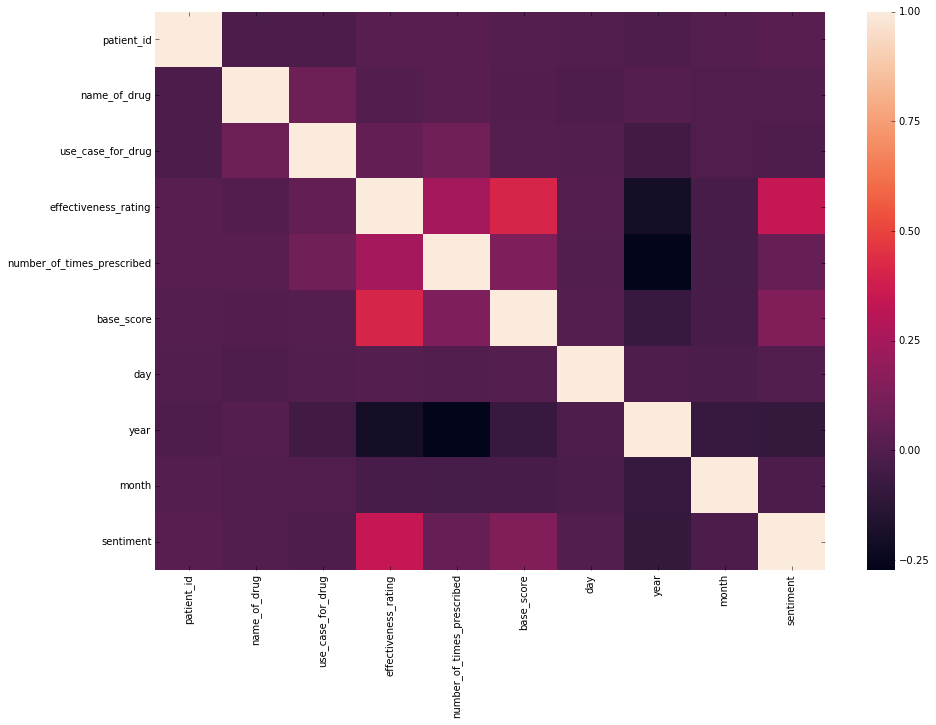

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

corr=df.corr(method ='pearson')
plt.figure(figsize=(15,10))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
df.corr()
